<a href="https://colab.research.google.com/github/LatiefDataVisionary/text-mining-and-natural-language-processing-college-task/blob/main/3labels_decision_tree_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Import Library yang Digunakan**

Berikut adalah library yang digunakan dalam proyek klasifikasi teks ini. Setiap library memiliki peran penting dalam tahapan analisis data, mulai dari pemrosesan data hingga pemodelan dan evaluasi.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns # Untuk visualisasi yang lebih menarik
import graphviz # Untuk visualisasi graphviz
import nltk # Untuk pra-pemrosesan teks lebih lanjut
from nltk.stem import WordNetLemmatizer # Untuk lemmatization
from nltk.corpus import stopwords as nltk_stopwords # Untuk custom stop words

# Download resource NLTK yang mungkin dibutuhkan
# Catch the LookupError directly when nltk.data.find fails
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    print("NLTK resource 'wordnet' not found. Downloading...")
    nltk.download('wordnet')
except Exception as e:
    print(f"An unexpected error occurred while checking/downloading 'wordnet': {e}")

try:
    nltk.data.find('corpora/omw-1.4')
except LookupError:
    print("NLTK resource 'omw-1.4' not found. Downloading...")
    nltk.download('omw-1.4') # WordNet multilingual resource
except Exception as e:
    print(f"An unexpected error occurred while checking/downloading 'omw-1.4': {e}")

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("NLTK resource 'stopwords' not found. Downloading...")
    nltk.download('stopwords')
except Exception as e:
    print(f"An unexpected error occurred while checking/downloading 'stopwords': {e}")


# Pengaturan umum untuk plot agar lebih menarik
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis") # Atau palet lain seperti 'pastel', 'muted'

NLTK resource 'wordnet' not found. Downloading...
NLTK resource 'omw-1.4' not found. Downloading...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Berikut adalah daftar library Python yang di-import untuk menjalankan analisis sentimen menggunakan model Decision Tree ini. Setiap library memainkan peran spesifik dalam alur kerja machine learning, mulai dari pemuatan data, pra-pemrosesan, pemodelan, hingga evaluasi dan visualisasi.

*   `pandas` (`pd`): Digunakan untuk manipulasi dan analisis data tabular, terutama untuk memuat dan mengelola dataset.
*   `numpy` (`np`): Menyediakan dukungan untuk array dan matriks multidimensi besar, bersama dengan kumpulan fungsi matematika tingkat tinggi untuk beroperasi pada array ini.
*   `sklearn.model_selection`:
    *   `train_test_split`: Untuk membagi dataset menjadi set pelatihan dan pengujian.
    *   `GridSearchCV`: Untuk melakukan pencarian hyperparameter terbaik secara sistematis menggunakan cross-validation.
    *   `cross_val_score`: Untuk mengevaluasi performa model menggunakan cross-validation.
*   `sklearn.feature_extraction.text`:
    *   `TfidfVectorizer`: Untuk mengubah koleksi dokumen teks mentah menjadi matriks fitur TF-IDF.
*   `sklearn.tree`:
    *   `DecisionTreeClassifier`: Implementasi algoritma Decision Tree untuk klasifikasi.
    *   `plot_tree`: Untuk memvisualisasikan pohon keputusan secara langsung menggunakan matplotlib.
    *   `export_graphviz`: Untuk mengekspor pohon keputusan dalam format DOT, yang kemudian dapat dirender oleh Graphviz.
*   `sklearn.metrics`:
    *   `accuracy_score`: Untuk menghitung akurasi klasifikasi.
    *   `confusion_matrix`: Untuk menghitung confusion matrix guna mengevaluasi akurasi klasifikasi.
    *   `classification_report`: Untuk membangun laporan teks yang menunjukkan metrik klasifikasi utama (precision, recall, F1-score).
    *   `ConfusionMatrixDisplay`: Untuk memvisualisasikan confusion matrix.
    *   `roc_auc_score` dan `roc_curve`: Untuk mengevaluasi performa model klasifikasi biner menggunakan kurva ROC dan AUC.
*   `matplotlib.pyplot` (`plt`): Library plotting 2D yang komprehensif untuk membuat visualisasi statis, animasi, dan interaktif.
*   `seaborn` (`sns`): Library visualisasi data Python berbasis matplotlib yang menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang menarik dan informatif.
*   `graphviz`: Digunakan untuk merender output dari `export_graphviz` (file DOT) menjadi representasi grafis dari pohon keputusan.
*   `nltk` (Natural Language Toolkit): Platform utama untuk membangun program Python untuk bekerja dengan data bahasa manusia.
    *   `WordNetLemmatizer`: Untuk melakukan lemmatisasi (mengubah kata ke bentuk dasarnya/lemma).
    *   `nltk_stopwords`: Menyediakan daftar stop words umum.

In [ ]:
# path = 'https://raw.githubusercontent.com/LatiefDataVisionary/text-mining-and-natural-language-processing-college-task/refs/heads/main/datasets/ramadan_labeled_sentiment.csv'
# path = 'https://raw.githubusercontent.com/LatiefDataVisionary/text-mining-and-natural-language-processing-college-task/refs/heads/main/datasets/data_3_kelas_real.csv'
path = 'https://raw.githubusercontent.com/notnsas/cautious-eureka/refs/heads/main/dataset/data_3_kelas_real.csv'
df = pd.read_csv(path)

print(f"Dataset berhasil di-load dari: {path}")
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")
df.head()

Dataset berhasil di-load dari: https://raw.githubusercontent.com/notnsas/cautious-eureka/refs/heads/main/dataset/data_3_kelas_real.csv
Jumlah baris: 836, Jumlah kolom: 11


,tweet_clean,Tweet,sentiment,sentiment_scores,neg,neu,pos,compound,sentiment_label,text_processed_raw,text_processed
0,"['abraj', 'al', 'bait', 'clock', 'tower', 'bea...",abraj al bait clock tower beams indicating com...,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral,abraj al bait clock tower beams indicating com...,abraj al bait clock tower beam indicating comm...
1,"['accounts', 'recognised', 'ramadan', 'none', ...",accounts recognised ramadan none recognised be...,2,"{'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'comp...",0.147,0.853,0.000,-0.4767,neutral,accounts recognised ramadan none recognised be...,account recognised ramadan none recognised beg...
2,"['admin', 'post', 'peaceful', 'ramadan', 'cele...",admin post peaceful ramadan celebrations east ...,2,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.000,0.714,0.286,0.4939,neutral,admin post peaceful ramadan celebrations east ...,admin post peaceful ramadan celebration east l...
3,"['admin', 'post', 'ramadan', 'norway']",admin post ramadan norway,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral,admin post ramadan norway,admin post ramadan norway
4,"['admin', 'post', 'ramadan', 'usual', 'peacefu...",admin post ramadan usual peaceful start englan...,2,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp...",0.000,0.775,0.225,0.4939,neutral,admin post ramadan usual peaceful start englan...,admin post ramadan usual peaceful start englan...


## **- Tahap Pra-Pemrosesan Data (Data Preprocessing)**


### **c. Pemrosesan Kolom Teks Fitur (Lemmatization dan Stop Word Removal):**


Kolom `tweet_clean` saat ini tampaknya berisi string yang merepresentasikan list. Ini perlu diubah menjadi string tunggal dari kata-kata yang digabungkan.


In [ ]:
# Fungsi untuk menggabungkan list kata menjadi string
def join_text_list(text_list_str):
    if isinstance(text_list_str, str):
        try:
            actual_list = eval(text_list_str)
            if isinstance(actual_list, list):
                return ' '.join(actual_list)
            else:
                # Jika eval menghasilkan bukan list (misalnya, sudah string utuh)
                return str(text_list_str) # Kembalikan sebagai string
        except Exception: # Tangkap error lebih umum dari eval
            return str(text_list_str) # Kembalikan string aslinya jika eval gagal
    elif isinstance(text_list_str, list):
        return ' '.join(text_list_str)
    return str(text_list_str) # Pastikan output selalu string

df['text_processed_raw'] = df['tweet_clean'].apply(join_text_list)

# Inisialisasi Lemmatizer dan Stop Words
lemmatizer = WordNetLemmatizer()
english_stopwords = set(nltk_stopwords.words('english'))
# Anda bisa tambahkan custom stop words di sini jika perlu
# custom_stopwords = {'ramadan', 'mubarak', ...}
# all_stopwords = english_stopwords.union(custom_stopwords)

def preprocess_text_advanced(text):
    if not isinstance(text, str): # Pastikan input adalah string
        return ""
    words = text.split() # Tokenisasi sederhana
    # Lemmatisasi dan penghapusan stop words
    processed_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in english_stopwords and word.isalpha()] # Hanya ambil kata alpha
    return ' '.join(processed_words)

print("\nMenerapkan pra-pemrosesan teks lanjutan (lemmatization, stop word removal)...")
df['text_processed'] = df['text_processed_raw'].apply(preprocess_text_advanced)

print("\nContoh hasil 'text_processed' setelah pra-pemrosesan lanjutan:")
display(df[['tweet_clean', 'text_processed_raw', 'text_processed']].head())


Menerapkan pra-pemrosesan teks lanjutan (lemmatization, stop word removal)...

Contoh hasil 'text_processed' setelah pra-pemrosesan lanjutan:


,tweet_clean,text_processed_raw,text_processed
0,"['abraj', 'al', 'bait', 'clock', 'tower', 'bea...",abraj al bait clock tower beams indicating com...,abraj al bait clock tower beam indicating comm...
1,"['accounts', 'recognised', 'ramadan', 'none', ...",accounts recognised ramadan none recognised be...,account recognised ramadan none recognised beg...
2,"['admin', 'post', 'peaceful', 'ramadan', 'cele...",admin post peaceful ramadan celebrations east ...,admin post peaceful ramadan celebration east l...
3,"['admin', 'post', 'ramadan', 'norway']",admin post ramadan norway,admin post ramadan norway
4,"['admin', 'post', 'ramadan', 'usual', 'peacefu...",admin post ramadan usual peaceful start englan...,admin post ramadan usual peaceful start englan...


## **- Tahap Ekstraksi Fitur (TF-IDF Vectorization)**

Setelah pra-pemrosesan dasar, teks perlu diubah menjadi format numerik yang dapat dipahami oleh model. TF-IDF (Term Frequency-Inverse Document Frequency) adalah teknik yang umum digunakan untuk ini.


In [ ]:
# Kita bisa coba tuning parameter TF-IDF ini nantinya jika akurasi masih kurang
tfidf = TfidfVectorizer(
    max_features=1500,    # Coba tingkatkan jumlah fitur
    ngram_range=(1, 2),   # Tetap pertimbangkan unigram dan bigram
    stop_words='english', # Stop words sudah ditangani sebagian di pra-pemrosesan, tapi bisa tetap di sini
    min_df=1,             # Abaikan term yang muncul di kurang dari 1 document (include all terms)
    max_df=0.99           # Abaikan term yang muncul di lebih dari 99% dokumen (only exclude extremely common terms)
)

# Use 'sentiment_label' column for the target variable as 'sentiment' has many NaNs
df_cleaned = df.dropna(subset=['sentiment_label']).copy() # Add .copy() to avoid SettingWithCopyWarning

# Map sentiment labels to numerical values
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df_cleaned['sentiment_label_encoded'] = df_cleaned['sentiment_label'].map(sentiment_mapping)

X = tfidf.fit_transform(df_cleaned['text_processed'])
y = df_cleaned['sentiment_label_encoded'].astype(int) # Use the encoded column and ensure y is integer

print(f"Shape dari matriks fitur X (setelah TF-IDF): {X.shape}")
print(f"Shape dari vektor target y: {y.shape}")

# Menampilkan jumlah fitur actual yang digunakan
print(f"Jumlah fitur actual yang digunakan oleh TF-IDF: {len(tfidf.get_feature_names_out())}")
print("\nContoh beberapa fitur teratas:")
print(list(tfidf.get_feature_names_out())[:20])

Shape dari matriks fitur X (setelah TF-IDF): (836, 1500)
Shape dari vektor target y: (836,)
Jumlah fitur actual yang digunakan oleh TF-IDF: 1500

Contoh beberapa fitur teratas:
['aameen', 'abeokuta', 'able', 'absolutely', 'abu', 'accept', 'accepted', 'according', 'account', 'act', 'act worship', 'action', 'activist', 'activity', 'additionally', 'admin', 'admin post', 'ago', 'ah', 'ahead']


## **3. Pemrosesan Pembagian (Split Data) Data Training dan Data Testing**


Dataset akan dibagi menjadi dua bagian: data training (untuk melatih model) dan data testing (untuk menguji performa model pada data yang belum pernah dilihat sebelumnya).


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,  # 25% data digunakan untuk testing
    random_state=42,  # Untuk reproduktifitas hasil
    stratify=y  # Mempertahankan proporsi kelas sentimen pada data training dan testing
)

print("Ukuran Data Setelah Pembagian:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

print("\nDistribusi kelas pada data training (proporsi):")
print(y_train.value_counts(normalize=True))
print(y_train.value_counts())

print("\nDistribusi kelas pada data testing (proporsi):")
print(y_test.value_counts(normalize=True))
print(y_test.value_counts())

Ukuran Data Setelah Pembagian:
X_train shape: (627, 1500), y_train shape: (627,)
X_test shape: (209, 1500), y_test shape: (209,)

Distribusi kelas pada data training (proporsi):
sentiment_label_encoded
1    0.829346
2    0.149920
0    0.020734
Name: proportion, dtype: float64
sentiment_label_encoded
1    520
2     94
0     13
Name: count, dtype: int64

Distribusi kelas pada data testing (proporsi):
sentiment_label_encoded
1    0.827751
2    0.153110
0    0.019139
Name: proportion, dtype: float64
sentiment_label_encoded
1    173
2     32
0      4
Name: count, dtype: int64


## **4. Pemodelan Decision Tree (Perhitungan Entropy sampai dengan Information Gain)**


Model Decision Tree akan dilatih menggunakan data training. Scikit-learn secara internal menangani perhitungan entropy/information gain saat membangun pohon. Kita akan menggunakan `GridSearchCV` untuk menemukan hyperparameter terbaik untuk model Decision Tree.


Pelatihan Model dengan Hyperparameter Tuning

In [ ]:
# Mendefinisikan grid parameter yang akan diuji, dengan rentang yang lebih luas
# dan penambahan class_weight untuk menangani potensi imbalance
param_grid_dt = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30], # Kami coba perluas rentangnya
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'class_weight': [None, 'balanced'],
    'ccp_alpha': [0.0, 0.001, 0.005, 0.01] # Cost-Complexity Pruning, bisa dicoba
}

## Kombinasi terbaik:
# {'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 15}


dt_model = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_dt,
    cv=5, # 5-fold cross-validation
    scoring='accuracy', # Metrik evaluasi utama
    n_jobs=-1, # Gunakan semua core CPU
    verbose=1 # Tampilkan log
)


print("Memulai GridSearchCV untuk Decision Tree...")
grid_search_dt.fit(X_train, y_train)

best_dt_model = grid_search_dt.best_estimator_
print("\nGridSearchCV selesai.")

print("Parameter terbaik yang ditemukan untuk Decision Tree:")
print(grid_search_dt.best_params_)

print(f"\nSkor akurasi cross-validation terbaik untuk Decision Tree: {grid_search_dt.best_score_:.4f}")

print("\nPenjelasan Terkait Pemilihan Split pada Decision Tree:")
print("Model Decision Tree yang dilatih menggunakan kriteria impurity untuk menentukan split terbaik pada setiap node.")
print(f"Kriteria impurity yang dipilih oleh GridSearchCV untuk model terbaik ini adalah: '{best_dt_model.criterion}'.")
if best_dt_model.criterion == 'entropy':
    print("   - Dengan kriteria 'entropy', model bertujuan untuk memaksimalkan Information Gain.")
    print("   - Information Gain mengukur pengurangan ketidakpastian setelah dataset di-split berdasarkan sebuah atribut.")
    print("   - Dihitung sebagai: IG(D, A) = Entropy(D) - Σ (|Dv| / |D|) * Entropy(Dv).")
elif best_dt_model.criterion == 'gini':
    print("   - Dengan kriteria 'gini', model bertujuan untuk meminimalkan Gini Impurity.")
    print("   - Gini Impurity mengukur probabilitas kesalahan klasifikasi jika sebuah elemen acak dari set labelnya ditebak secara acak sesuai distribusi label di set tersebut.")
    print("   - Dihitung sebagai: Gini(D) = 1 - Σ (pi)^2.")
print("Algoritma seperti ID3, C4.5 (menggunakan Information Gain atau Gain Ratio), dan CART (menggunakan Gini Index) adalah implementasi dari konsep ini.")
print("Scikit-learn mengimplementasikan versi optimasi dari algoritma CART untuk Decision Trees.")

Memulai GridSearchCV untuk Decision Tree...
Fitting 5 folds for each of 3360 candidates, totalling 16800 fits

GridSearchCV selesai.
Parameter terbaik yang ditemukan untuk Decision Tree:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 8, 'min_samples_split': 2}

Skor akurasi cross-validation terbaik untuk Decision Tree: 0.8596

Penjelasan Terkait Pemilihan Split pada Decision Tree:
Model Decision Tree yang dilatih menggunakan kriteria impurity untuk menentukan split terbaik pada setiap node.
Kriteria impurity yang dipilih oleh GridSearchCV untuk model terbaik ini adalah: 'gini'.
   - Dengan kriteria 'gini', model bertujuan untuk meminimalkan Gini Impurity.
   - Gini Impurity mengukur probabilitas kesalahan klasifikasi jika sebuah elemen acak dari set labelnya ditebak secara acak sesuai distribusi label di set tersebut.
   - Dihitung sebagai: Gini(D) = 1 - Σ (pi)^2.
Algoritma seperti ID3, C4.5 (menggunakan Information Gain atau Gain R

## **5. Tampilkan Hasil Akurasi dan Tabel Confusion Matrix**


Setelah model dilatih, performanya akan dievaluasi menggunakan data testing.


### **a. Prediksi pada Data Testing dan Laporan Klasifikasi:**


In [ ]:
# Prediksi pada data testing
y_pred_dt = best_dt_model.predict(X_test)
y_pred_proba_dt = best_dt_model.predict_proba(X_test)[:, 1] # Probabilitas untuk kelas positif

# Akurasi
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Akurasi Model Decision Tree pada Data Testing: {accuracy_dt:.4f}")

# ROC AUC Score
try:
    roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
    print(f"ROC AUC Score Decision Tree: {roc_auc_dt:.4f}")
except ValueError:
    print("ROC AUC Score tidak dapat dihitung (mungkin hanya satu kelas yang diprediksi).")


# Laporan Klasifikasi
print("\nLaporan Klasifikasi Decision Tree:")
print(classification_report(y_test, y_pred_dt, target_names=['Negative (0)', 'Positive (1)', 'Neutral (2)']))

Akurasi Model Decision Tree pada Data Testing: 0.8565
ROC AUC Score tidak dapat dihitung (mungkin hanya satu kelas yang diprediksi).

Laporan Klasifikasi Decision Tree:
              precision    recall  f1-score   support

Negative (0)       0.00      0.00      0.00         4
Positive (1)       0.88      0.97      0.92       173
 Neutral (2)       0.65      0.34      0.45        32

    accuracy                           0.86       209
   macro avg       0.51      0.44      0.46       209
weighted avg       0.82      0.86      0.83       209



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **b. Hasil (Parameter Terbaik dan Penjelasan Implisit Entropy/Information Gain):**


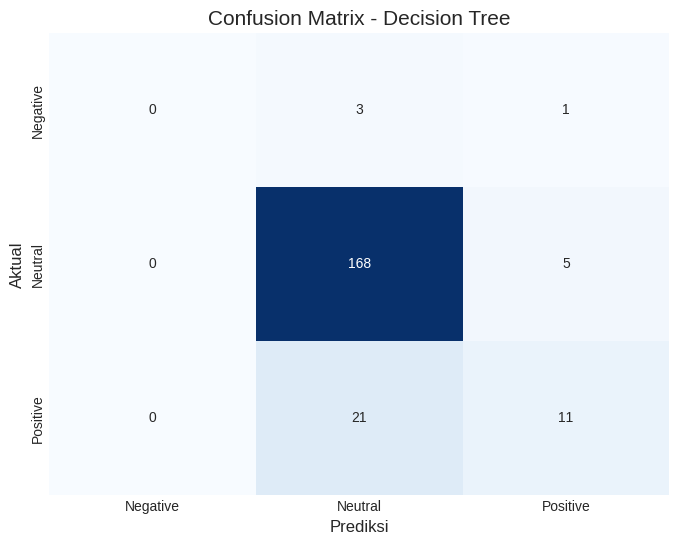


Interpretasi Confusion Matrix:
True Negatives (TN): 0 - Tweet negatif yang diprediksi benar sebagai negatif.
False Positives (FP): 4 - Tweet negatif yang salah diprediksi sebagai neutral atau positif.
False Neutrals (FN_Neg): 0 - Tweet neutral yang salah diprediksi sebagai negatif.
True Neutrals (TN): 168 - Tweet neutral yang diprediksi benar sebagai neutral.
False Positives (FP_Neg): 5 - Tweet neutral yang salah diprediksi sebagai positif.
False Negatives (FN_Neg): 21 - Tweet positif yang salah diprediksi sebagai negatif atau neutral.
True Positives (TP): 11 - Tweet positif yang diprediksi benar sebagai positif.


In [ ]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'], # Updated labels
            yticklabels=['Negative', 'Neutral', 'Positive']) # Updated labels
plt.title('Confusion Matrix - Decision Tree', fontsize=15)
plt.ylabel('Aktual', fontsize=12)
plt.xlabel('Prediksi', fontsize=12)
plt.show()

print("\nInterpretasi Confusion Matrix:")
# Update interpretation based on three classes
print(f"True Negatives (TN): {cm_dt[0,0]} - Tweet negatif yang diprediksi benar sebagai negatif.")
print(f"False Positives (FP): {cm_dt[0,1] + cm_dt[0,2]} - Tweet negatif yang salah diprediksi sebagai neutral atau positif.") # Summing errors for FP
print(f"False Neutrals (FN_Neg): {cm_dt[1,0]} - Tweet neutral yang salah diprediksi sebagai negatif.")
print(f"True Neutrals (TN): {cm_dt[1,1]} - Tweet neutral yang diprediksi benar sebagai neutral.")
print(f"False Positives (FP_Neg): {cm_dt[1,2]} - Tweet neutral yang salah diprediksi sebagai positif.")
print(f"False Negatives (FN_Neg): {cm_dt[2,0] + cm_dt[2,1]} - Tweet positif yang salah diprediksi sebagai negatif atau neutral.") # Summing errors for FN
print(f"True Positives (TP): {cm_dt[2,2]} - Tweet positif yang diprediksi benar sebagai positif.")

## **6. Tampilkan Pohon Keputusan**


Visualisasi pohon keputusan membantu memahami bagaimana model membuat keputusan.


**a. Visualisasi dengan plot_tree (Pohon Lebih Rinci):**


Untuk pohon yang sangat besar, visualisasi penuh mungkin tidak praktis. Kita akan membatasi kedalaman yang ditampilkan agar lebih mudah dibaca.


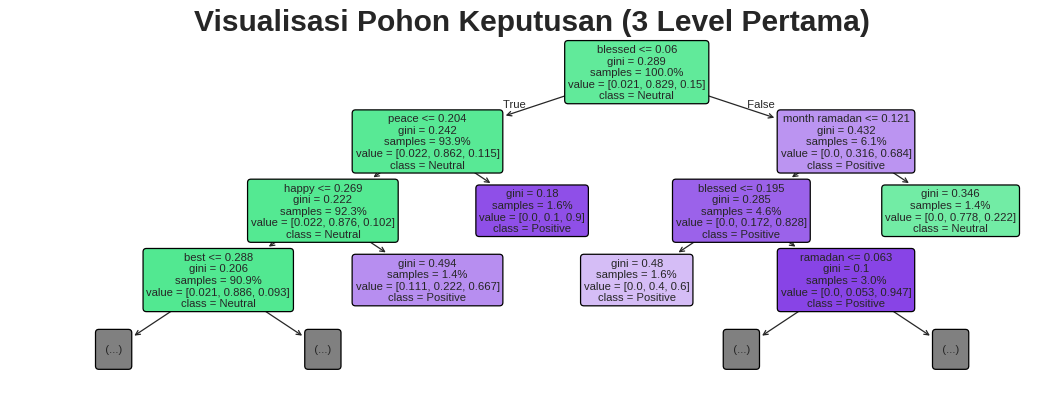

Visualisasi dengan plot_tree telah ditampilkan dan disimpan sebagai 'decision_tree_plot_tree.png'


In [ ]:
plt.figure(figsize=(15, 5), dpi=90) # Tingkatkan ukuran dan DPI untuk detail
plot_tree(
    best_dt_model,
    filled=True,
    feature_names=tfidf.get_feature_names_out(),
    class_names=['Negative', 'Neutral', 'Positive'], # Updated class_names
    max_depth=3, # Tampilkan 3 level pertama agar tidak terlalu ramai
    fontsize=9,
    proportion=True,
    rounded=True,
    precision=3, # Tingkatkan presisi
    impurity=True,
    label='all'
)
plt.title('Visualisasi Pohon Keputusan (3 Level Pertama)', fontsize=24, fontweight='bold')
plt.savefig("decision_tree_plot_tree.png", dpi=300, bbox_inches='tight') # Simpan gambar
plt.show()
print("Visualisasi dengan plot_tree telah ditampilkan dan disimpan sebagai 'decision_tree_plot_tree.png'")

### **b. Visualisasi dengan `graphviz` (Untuk Potensi Export):**


Ini akan menghasilkan file yang bisa disimpan dan dilihat dengan kualitas lebih baik jika pohonnya kompleks.


In [ ]:
dot_data = export_graphviz(
    best_dt_model,
    out_file=None,
    feature_names=tfidf.get_feature_names_out(),
    class_names=['Negative', 'Positive'],
    filled=True,
    rounded=True,
    max_depth=3, # Batasi kedalaman untuk Graphviz juga
    special_characters=True,
    proportion=True,
    impurity=True,
    node_ids=True, # Tambahkan ID node
    label='all'
)

graph = graphviz.Source(dot_data, format="png")
try:
    graph.render("decision_tree_graphviz") # Simpan sebagai 'decision_tree_graphviz.png'
    print("\nVisualisasi pohon keputusan dengan Graphviz telah dirender dan disimpan sebagai 'decision_tree_graphviz.png'")
    from IPython.display import Image
    display(Image(filename='decision_tree_graphviz.png'))
except graphviz.backend.execute.CalledProcessError as e:
    print(f"Error saat merender Graphviz: {e}")
    print("Pastikan Graphviz terinstal dan ada di PATH sistem Anda.")
    print("Anda masih bisa mengonversi file 'decision_tree_graphviz.dot' (jika ada) secara manual menggunakan Graphviz.")

IndexError: index 2 is out of bounds for axis 0 with size 2

## **- Analisis Fitur Penting (Feature Importance Analysis)**


Tahap ini menganalisis fitur (kata atau bigram) mana yang paling berpengaruh dalam membuat keputusan klasifikasi menurut model Decision Tree.


In [ ]:
# Mendapatkan feature importances dari model terbaik
importances_dt = best_dt_model.feature_importances_
feature_names_dt = tfidf.get_feature_names_out()

# Membuat DataFrame
feature_importances_df_dt = pd.DataFrame({
    'Fitur': feature_names_dt,
    'Pentingnya': importances_dt
}).sort_values('Pentingnya', ascending=False)

# Menampilkan 20 fitur terpenting
top_20_features_dt = feature_importances_df_dt.head(20)
print("\nTop 20 Fitur Terpenting Menurut Model Decision Tree:")
display(top_20_features_dt)

# Visualisasi
plt.figure(figsize=(12, 10)) # Sesuaikan ukuran agar label y tidak tumpang tindih
sns.barplot(x='Pentingnya', y='Fitur', data=top_20_features_dt, palette='magma')
plt.title('Top 20 Feature Importances - Decision Tree', fontsize=16, fontweight='bold')
plt.xlabel('Skor Pentingnya Fitur', fontsize=13)
plt.ylabel('Fitur (Kata/N-gram)', fontsize=13)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()